In [13]:
!pip install --upgrade pydantic langchain langchain_community

  Using cached langchain_community-0.3.17-py3-none-any.whl.metadata (2.4 kB)
  Using cached pydantic_settings-2.7.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.5 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.18.4
    Uninstalling pydantic_core-2.18.4:
      Successfully uninstalled pydantic_core-2.18.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.4
 

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-groq 0.1.5 requires langchain-core<0.3,>=0.1.45, but you have langchain-core 0.3.35 which is incompatible.
langchain-objectbox 0.1.0 requires langchain-core<0.2.0,>=0.1.45, but you have langchain-core 0.3.35 which is incompatible.
langchain-openai 0.1.7 requires langchain-core<0.3,>=0.1.46, but you have langchain-core 0.3.35 which is incompatible.
langserve 0.2.3 requires langchain-core<0.3,>=0.1, but you have langchain-core 0.3.35 which is incompatible.


In [35]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.llms import Ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain
import os
import bs4

### Loading the document

In [15]:
pdf_loader = PyPDFLoader("A-comperative-analysis-on-fake-news-detection-methods.pdf")
pdf = pdf_loader.load()


In [16]:
pdf

[Document(metadata={'source': 'A-comperative-analysis-on-fake-news-detection-methods.pdf', 'page': 0}, page_content='A Comparative Analysis on Fake News Detection Methods\nMd. Badhon Miah\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\nbadhon1512@gmail.com\nTawhid Khondakar\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\ntawhid.khondakar18@gmail.com\nAtanu Saha\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\natanu.saha415@gmail.com\nArrafi Ahsan Somudro\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\narrafeeahsan@gmail.com\nDr. Dip Nandi\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\ndip.nandi@aiub.edu\nABSTRACT\nIn present era, believing a news is as easier that it is also hard to\nbelieve. It is highly possible that people who came across a news\ndon’t justify it before believing. Majority of people believe a news on\nthe basis of its spreading. But believing a news which is fake impacts\n

### Creating chunk

In [24]:
spiliter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 15)

In [25]:
documents = spiliter.split_documents(pdf)

In [36]:
documents[:3]

[Document(metadata={'source': 'A-comperative-analysis-on-fake-news-detection-methods.pdf', 'page': 0}, page_content='A Comparative Analysis on Fake News Detection Methods\nMd. Badhon Miah\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\nbadhon1512@gmail.com\nTawhid Khondakar\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\ntawhid.khondakar18@gmail.com\nAtanu Saha\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\natanu.saha415@gmail.com\nArrafi Ahsan Somudro\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\narrafeeahsan@gmail.com\nDr. Dip Nandi'),
 Document(metadata={'source': 'A-comperative-analysis-on-fake-news-detection-methods.pdf', 'page': 0}, page_content='Dr. Dip Nandi\nAmerican International\nUniversity-Bangladesh\nDhaka, Bangladesh\ndip.nandi@aiub.edu\nABSTRACT\nIn present era, believing a news is as easier that it is also hard to\nbelieve. It is highly possible that people who came across a news\ndon’t justi

#### Vector DB

In [29]:
!ollama pull nomic-embed-text


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling 970aa74c0a90...   0% ▕                ▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕                ▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕                ▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕                ▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕                ▏ 386 KB/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕                ▏ 795 KB/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕                ▏ 1.3 MB/274 MB                  pulling manifest 
pulling 970aa74c0a90...   1% ▕                ▏ 1.8 MB/274 MB                  pulling manifest 
pulling 970aa74c0a90...   1% ▕                ▏ 2.1 MB

In [30]:
db = FAISS.from_documents(documents=documents, embedding= OllamaEmbeddings(model="nomic-embed-text"))

In [31]:
query = "Who wrote the paper -A Comparative Analysis on Fake News Detection Methods?"
retireved_results=db.similarity_search(query)
print(retireved_results[0].page_content)

we conclude by giving a table which contains comparative analysis
of detecting methods and suggested some future work.
KEYWORDS
Fake news, Fake News Detection Method, Social Media, Satire,
Hoaxes
ACM Reference Format:
Md. Badhon Miah, Tawhid Khondakar, Atanu Saha, Arrafi Ahsan Somudro,
and Dr. Dip Nandi. 2018. A Comparative Analysis on Fake News Detection
Methods. In Proceedings of ACM Conference (Conference’17). ACM, New
York, NY, USA, 8 pages. https://doi.org/10.1145/1122445.1122456


### Model

In [32]:
model = Ollama(model="deepseek-r1:1.5b")


C:\Users\badho\AppData\Local\Temp\ipykernel_6164\1072319220.py:1: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  model = Ollama(model="deepseek-r1:1.5b")


In [46]:
prompt = ChatPromptTemplate.from_template("""
Answer the question briefly based on the context 
<contex>
{context}
</contex>
Question : {input}                                          
""")

### Retrieval- Bascially fetch top-k most relevent doc from (vectorstore,.....)

In [47]:
retrieval = db.as_retriever()

In [48]:
retrieval

VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000253F3381410>, search_kwargs={})

#### Chain

In [49]:
chain = create_stuff_documents_chain(model, prompt)

#### retrieval Chain - combines retrieval and response generation

In [50]:
r_chain = create_retrieval_chain(retrieval, chain)

In [70]:
response=r_chain.invoke({"input":"Who wrote the paper -A Comparative Analysis on Fake News Detection Methods?"})


In [71]:
response['answer']

'<think>\nAlright, let me try to figure out who wrote this paper. The question is asking about who authored the paper titled "A Comparative Analysis on Fake News Detection Methods." \n\nFirst, I\'ll look at the context provided. There\'s a reference section where it mentions the authors of another paper. It says they are ACM, Badhon Miah, Tawhid Khondakar, Atanu Saha, Arrabi Ahsan Somudro, and Dr. Dip Nandi. So that seems like five people associated with that paper.\n\nThe question is about a different paper titled "A Comparative Analysis on Fake News Detection Methods." The context then discusses the structure of this other paper, mentioning topics like fake news detection methods and comparing techniques across social media platforms. It also refers back to another conference called Conference’17 in Washington, DC, discussing similar themes.\n\nSince the title is about a method or analysis related to fake news on social media, it makes sense that the authors are from the ACM organiza

In [ ]:
import re

def fetch_ans(text):
    text = re.sub(r"<think>.*?</think>", "", text, flags=re.DOTALL).strip()

    answer_match = re.search(r"(?:\*\*Answer:\*\*|Final Answer:|The key authors are:)\s*(.+)", text, re.DOTALL)

    if answer_match:
        return answer_match.group(1).strip()
    
    paragraphs = text.strip().split("\n\n")
    return paragraphs[-1].strip() if paragraphs else text.strip()


In [75]:
fetch_ans(response['answer'])

'1. Badhon Miah\n2. Tawhid Khondakar\n3. Atanu Saha\n4. Arrabi Ahsan Somudro\n5. Dr. Dip Nandi\n\nThese individuals are part of the same research group that published this paper, likely writing together with other colleagues in 2018.'

The authors of the paper are Badhon Miah and colleagues from the University of Dhaka. They presented their work at the ACM Conference titled "ACM Conference (Conference’17)" in Washington, DC, USA in July 2017, and the paper was published in 2018 under an ACM reference.

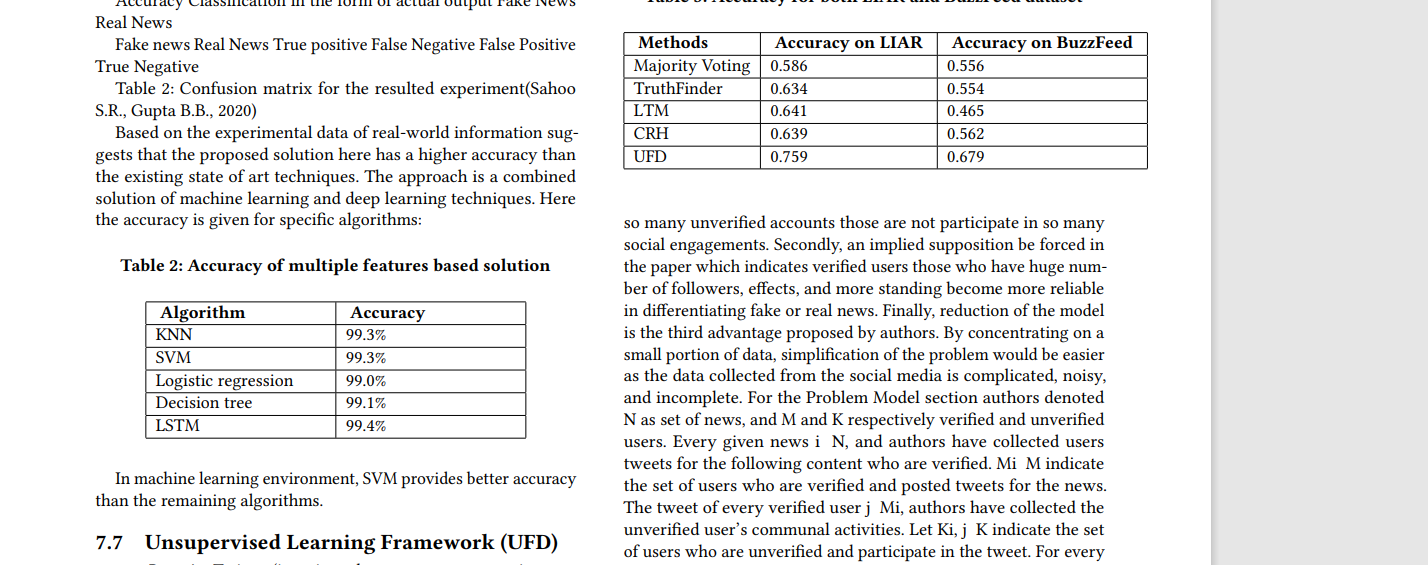

In [78]:
response=r_chain.invoke({"input":"What is the accuracy of LSTM in their research?"})


In [79]:
fetch_ans(response['answer'])

'Answer: LSTM achieved a 99.4% accuracy in their study.'

In [80]:
response=r_chain.invoke({"input":"Describe this paper in one line"})


In [81]:
fetch_ans(response['answer'])

'The paper evaluates various methods for detecting fake news, with a focus on their effectiveness in identifying sources within social media platforms.'

'The paper evaluates various methods for detecting fake news, with a focus on their effectiveness in identifying sources within social media platforms.'|